In [41]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pandas import read_excel
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import ext_ols

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [12]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df1 = train[train['Sex'].apply(lambda x : x in ['male'])]
print(df1)
df2 = train[train['Sex'].apply(lambda x : x in ['female'])]
print(df2)

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1   

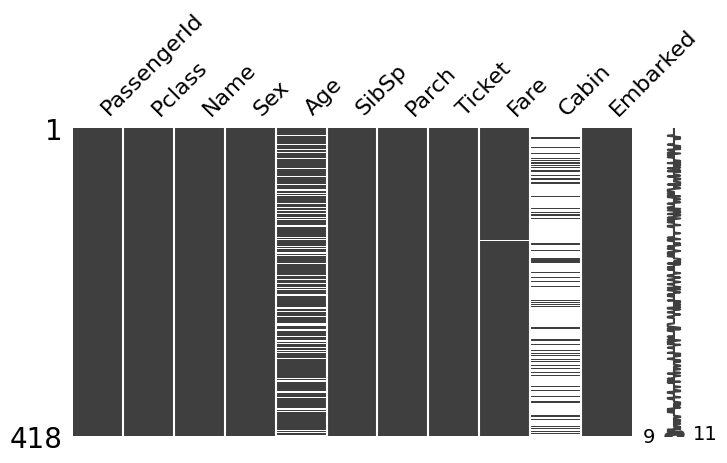

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0              1         0       3    male  22.0      1      0   7.2500
1              2         1       1  female  38.0      1      0  71.2833
2              3         1       3  female  26.0      0      0   7.9250
3              4         1       1  female  35.0      1      0  53.1000
4              5         0       3    male  35.0      0      0   8.0500
..           ...       ...     ...     ...   ...    ...    ...      ...
886          887         0       2    male  27.0      0      0  13.0000
887          888         1       1  female  19.0      0      0  30.0000
888          889         0       3  female   NaN      1      2  23.4500
889          890         1       1    male  26.0      0      0  30.0000
890          891         0       3    male  32.0      0      0   7.7500

[891 rows x 8 columns]


In [8]:
import missingno as msno
msno.matrix(test, figsize=(8,4))
plt.show()
train1 = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

In [9]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

ValueError: could not convert string to float: 'male'

<Figure size 800x500 with 0 Axes>

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
train1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.0,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.0,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.0,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.0,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.0,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.0,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.0,80.000000,8.000000,6.000000,512.329200


In [ ]:
train1 = train1.fillna(29)
train1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,29.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


방법 1

In [ ]:
names = train1.columns
n = len(names)
pv = 0.05

data = []

for i in range(0, n):
    fields = names[1] + 'vs' + names[i]
    s, p = stats.pearsonr(train1[names[1]], train1[names[i]])
    result = p < pv

    data.append({'fields': fields, 'statistic':s, 'pvalue': p, 'result': result})

rdf = DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,statistic,pvalue,result
fields,,,
SurvivedvsPassengerId,-0.005007,8.813658e-01,False
SurvivedvsSurvived,1.000000,0.000000e+00,True
SurvivedvsPclass,-0.338481,2.537047e-25,True
SurvivedvsSex,NaN,NaN,False
SurvivedvsAge,-0.067814,4.300040e-02,True
SurvivedvsSibSp,-0.035322,2.922439e-01,False
SurvivedvsParch,0.081629,1.479925e-02,True
SurvivedvsFare,0.257307,6.120189e-15,True


In [ ]:
x = train1.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']].values
x

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    , 29.    ,  1.    ,  2.    , 23.45  ,  1.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [ ]:
import statsmodels.api as sm
results = sm.OLS(train1['Survived'], sm.add_constant(x)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     34.86
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.35e-32
Time:                        17:58:34   Log-Likelihood:                -541.87
No. Observations:                 891   AIC:                             1096.
Df Residuals:                     885   BIC:                             1124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2073      0.023     -9.006      0.0

- 회귀식은 Survived = (-0.207 * Pclass)-(0.007 *Age)-(-0.042 * SibSp) + (0.045 * Parch) + (0.0008 * Fare) + 1.06다.
- F-statistic의 p-value는 1.35e-32로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다.
- 중간쯤에 보면 coef와 여러 변수들의 p-value 값이 나와있습니다.
- 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',는 0.05미만이므로 유의미하다고 볼 수 있다.
- coef가 양수면 양의 상관관계를 보이고 -면 음의 상관관계를 보인다.
- 마지막으로 모델 적합성 = 설명력(Adj. R-squared:)은 0.16정도로 16퍼센트만큼의 설명력을 지니고 있기에 굉장히 낮은 수치를 보이고 있다.
- 전체 데이터셋 중 약 16.5% ~ 16.0% 밖에 설명하지 못 했다. 따라서 모델 전체는 과소적합으로 생존에 영향을 주는 변수가 더 있을 것임을 강하게 암시하고 있다. 
- 60넘어가는 수치면 사실 쓸만한 것/ 값이 되게 높을수록 -> 과대적합
- 지나치게 낮은 경우 -> 과소적합

In [ ]:
# 위의 corr() histmap 그림과 아래 유의미한 수치들을 확인하여 보면 
# Survived에 대한 유의미한 자료는 pclass와 fare로 추정된다.
x = train1.loc[:, ['Pclass', 'Fare']].values
x

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [ ]:
import statsmodels.api as sm
results = sm.OLS(train1['Survived'], sm.add_constant(x)).fit()
# add_constanst 상수항 결합(가중치 값 추정)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     61.61
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.78e-26
Time:                        17:58:34   Log-Likelihood:                -564.07
No. Observations:                 891   AIC:                             1134.
Df Residuals:                     888   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7310      0.060     12.197      0.000       0.613       0.849
x1            -0.1643      0.022     -7.501      0.000      -0.207      -0.121
x2             0.0010      0.000      2.714      0.007       0.000       0.002
==============================================================================
Omnibus:                     1030.575   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.979
Skew:                           0.456   Prob(JB):                     4.77e-20
Kurtosis:                       1.750   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     61.61
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.78e-26
Time:                        17:58:34   Log-Likelihood:                -564.07
No. Observations:                 891   AIC:                             1134.
Df Residuals:                     888   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7310      0.060     12.197      0.0

### skikt-learn 패키지를 사용한 선형 회귀분석
###### sciket-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 LinearRegression 클래스를 사용한다.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수, 디폴트 값이 True.
만약 상수항이 없으면 fit_intercept=False로 설정한다.


coef_ : 추정된 가중치 백터
intercept_ : 추정된 상수항

In [ ]:
model = model.fit(x,train1['Survived'])

In [ ]:
y_new = model.predict(x)

In [ ]:
# LinsearRegression 으로 선형회귀
model = LinearRegression().fit(x, train1['Survived'])
print(model.intercept_, model.coef_)

0.7309906771742805 [-0.16432464  0.00100032]


In [ ]:
# predcit 매서드를 사용하면 새로운 X값에 대응하는 y값을 예측할 수 있다.
# 단 x값은 2차원 배열을 써야 한다

statsmodels 패키지에서는 OLS 클래스를 사용하여 선형 회귀분석을 실시한다. OLS 클래스 사용법은 다음과 같다.

- 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다.
- OLS 클래스 객체 생성. 이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다. data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.

In [ ]:
from statsmodels.formula.api import ols
ols('Pclass ~ Survived', data=train1).fit().summary()
# ols = Ordinary leasy squares
# Df model : 독립변수의 개수
# Df residuals : 전체 표본개수에서 독립변수, 종속변수의 개수를 뺀 것
# intercept coef : 절편, 독립변수 coef: 기울기

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pclass   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.54e-25
Time:                        17:58:35   Log-Likelihood:                -1050.0
No. Observations:                 891   AIC:                             2104.
Df Residuals:                     889   BIC:                             2114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5319      0.034     75.364      0.000       2.466       2.598
Survived      -0.5816      0.054    -10.725      0.000      -0.688      -0.475
==============================================================================
Omnibus:                      146.941   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.600
Skew:                          -0.561   Prob(JB):                     3.83e-17
Kurtosis:                       2.119   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 회귀분석 결과에서 나오는 주요 결과물들의 설명을 아래와 같이 정리해 보았다.

 

   - Dep. Variable: Dependent variable, 즉 종속변수를 의미한다.

   - Model: 모델링 방법을 뜻하고, OLS는  Ordinary Least Squares의 약자이다.

      ** 참고로 OLS란, 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법(method of least squares, least squares approximation)이라고도 하며, 어떤 계의 해방정식을 근사적으로 구하는 방법으로서 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다. [출처: 위키백과]

   - No. Observations: Number of observations, 관찰표본 수, 즉 총 표본 수를 뜻한다. 

   - Df Residuals: DF는 Degree of Freedom으로 자유도를 뜻하는데, DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구한다. 이번 회귀분석에서 DF Residuals를 구하자면,  전체 표본 수 50개 - 종속변수1개 - 독립변수1개 = 48로 구할 수 있다.

   - Df Model: 독립변수의 개수이다.

   - R squared: R의 제곱이라는 뜻이고 결정계수를 의미한다. 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타낸다. SSTr/SST이나 상관계수 R을 제곱해서 구할 수 있다.

   - F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다. (상세 내용은 본 포스팅 #5. 에서 추가설명 한다)

   - Prob: F통계량에 해당하는 P-value를 의미한다. P는 Probability의 첫글자이다.

  [회귀계수]: 다음 두 값은 해당 모델의 회귀계수들이다.

   - Intercept coef: Intercept coefficient는 회귀식의 절편 값을 의미한다.

   - Survived coef: 독립변수 coefficient는 독립변수 "Survived"의 회귀계수를 의미하며, 회귀식에서 기울기를 의미한다. 

     --> 위의 회귀계수들을 활용해 다음과 같이 회귀식을 수기로 작성할 수 있다.

     --> y = -0.5816X +2.5319

In [13]:
from pandas import read_excel, DataFrame
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
model = ols("Survived ~ Sex", data=train)
fit = model.fit()
tbl = fit.summary()
tbl

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.41e-69
Time:                        13:53:05   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7420      0.023     32.171      0.000       0.697       0.787
Sex[T.male]    -0.5531      0.029    -19.298      0.000      -0.609      -0.497
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.exog_names

['Intercept', 'Sex[T.male]']

In [18]:
len(tbl.tables)

3

In [19]:
tbl.tables[0]

Dep. Variable:,Survived,R-squared:,0.295
Model:,OLS,Adj. R-squared:,0.294
Method:,Least Squares,F-statistic:,372.4
Date:,"Tue, 25 Jul 2023",Prob (F-statistic):,1.41e-69
Time:,13:53:05,Log-Likelihood:,-466.09
No. Observations:,891,AIC:,936.2
Df Residuals:,889,BIC:,945.8
Df Model:,1,,
Covariance Type:,nonrobust,,


In [20]:
tbl.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7420,0.023,32.171,0.000,0.697,0.787
Sex[T.male],-0.5531,0.029,-19.298,0.000,-0.609,-0.497


In [21]:
tbl.tables[2]

Omnibus:,25.424,Durbin-Watson:,1.959
Prob(Omnibus):,0.000,Jarque-Bera (JB):,27.169
Skew:,0.427,Prob(JB):,1.26e-06
Kurtosis:,2.963,Cond. No.,3.13


첫 번째 표의 내용

In [22]:
import re
my = {}
for k in range(0,3,2):
    items = tbl.tables[k].data

    for item in items:
        n = len(item)

        for i in range(0, n, 2):
            key = item[i].strip()[:-1]
            value = item[i+1].strip()

            if key and value:
                my[key] = value
my

{'Dep. Variable': 'Survived',
 'R-squared': '0.295',
 'Model': 'OLS',
 'Adj. R-squared': '0.294',
 'Method': 'Least Squares',
 'F-statistic': '372.4',
 'Date': 'Tue, 25 Jul 2023',
 'Prob (F-statistic)': '1.41e-69',
 'Time': '13:53:05',
 'Log-Likelihood': '-466.09',
 'No. Observations': '891',
 'AIC': '936.2',
 'Df Residuals': '889',
 'BIC': '945.8',
 'Df Model': '1',
 'Covariance Type': 'nonrobust',
 'Omnibus': '25.424',
 'Durbin-Watson': '1.959',
 'Prob(Omnibus)': '0.000',
 'Jarque-Bera (JB)': '27.169',
 'Skew': '0.427',
 'Prob(JB)': '1.26e-06',
 'Kurtosis': '2.963',
 'Cond. No': '3.13'}

VIF값 생성

In [23]:
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)

    if vif < 10:
        print("%s의 VIF: %f (good)" % (model.exog_names[i], vif))
    else:
        print("%s의 VIF: %f (bad)" % (model.exog_names[i], vif))

Sex[T.male]의 VIF: 1.000000 (good)


In [24]:
my['variables'] = []

for i, v in enumerate(tbl.tables[1].data):
    if i == 0:
        continue

    # 변수의 이름
    name = v[0].strip()
    # 변수의 이름 목록
    name_list = list(model.exog_names)
    # 변수의 이름 목록에서 현재 변수가 몇 번째 항목인지 찾기 
    j = name_list.index(name)

    vif = 0

    # 0번째인 Intercept는 제외
    if j > 0:
        vif = variance_inflation_factor(model.exog, j)

    my['variables'].append({
        "name": name,
        "coef": v[1].strip(),
        "std err": v[2].strip(),
        "t": v[3].strip(),
        "P-value": v[4].strip(),
        "Beta": 0,
        "VIF": vif,
    })

my

{'Dep. Variable': 'Survived',
 'R-squared': '0.295',
 'Model': 'OLS',
 'Adj. R-squared': '0.294',
 'Method': 'Least Squares',
 'F-statistic': '372.4',
 'Date': 'Tue, 25 Jul 2023',
 'Prob (F-statistic)': '1.41e-69',
 'Time': '13:53:05',
 'Log-Likelihood': '-466.09',
 'No. Observations': '891',
 'AIC': '936.2',
 'Df Residuals': '889',
 'BIC': '945.8',
 'Df Model': '1',
 'Covariance Type': 'nonrobust',
 'Omnibus': '25.424',
 'Durbin-Watson': '1.959',
 'Prob(Omnibus)': '0.000',
 'Jarque-Bera (JB)': '27.169',
 'Skew': '0.427',
 'Prob(JB)': '1.26e-06',
 'Kurtosis': '2.963',
 'Cond. No': '3.13',
 'variables': [{'name': 'Intercept',
   'coef': '0.7420',
   'std err': '0.023',
   't': '32.171',
   'P-value': '0.000',
   'Beta': 0,
   'VIF': 0},
  {'name': 'Sex[T.male]',
   'coef': '-0.5531',
   'std err': '0.029',
   't': '-19.298',
   'P-value': '0.000',
   'Beta': 0,
   'VIF': 1.0000000000000007}]}

In [25]:
train1 = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0              1         0       3    male  22.0      1      0   7.2500
1              2         1       1  female  38.0      1      0  71.2833
2              3         1       3  female  26.0      0      0   7.9250
3              4         1       1  female  35.0      1      0  53.1000
4              5         0       3    male  35.0      0      0   8.0500
..           ...       ...     ...     ...   ...    ...    ...      ...
886          887         0       2    male  27.0      0      0  13.0000
887          888         1       1  female  19.0      0      0  30.0000
888          889         0       3  female   NaN      1      2  23.4500
889          890         1       1    male  26.0      0      0  30.0000
890          891         0       3    male  32.0      0      0   7.7500

[891 rows x 8 columns]


In [26]:
train1.fillna(train1['Age'].mean())
train1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [27]:
train1.isnull().sum()
train1.fillna(0)
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [28]:
x = train1.loc[:, ['Pclass', 'SibSp', 'Parch', 'Fare']].values
x

array([[ 3.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    ,  0.    ,  7.75  ]])

In [29]:
import statsmodels.api as sm
model = sm.OLS(train1['Survived'], train1[['Pclass', 'SibSp', 'Parch', 'Fare']])
result = model.fit()
tbl = result.summary()
tbl

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              132.6
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                    8.93e-89
Time:                        13:53:19   Log-Likelihood:                         -628.90
No. Observations:                 891   AIC:                                      1266.
Df Residuals:                     887   BIC:                                      1285.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0926      0.008     11.896      0.000       0.077       0.108
SibSp         -0.0441      0.017     -2.654      0.008      -0.077      -0.011
Parch          0.0471      0.023      2.062      0.040       0.002       0.092
Fare           0.0040      0.000     12.676      0.000       0.003       0.005
==============================================================================
Omnibus:                     3520.467   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.914
Skew:                           0.410   Prob(JB):                     1.81e-20
Kurtosis:                       1.667   Cond. No.                         87.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model.exog_names

['Pclass', 'SibSp', 'Parch', 'Fare']

In [31]:
len(tbl.tables)

3

In [32]:
tbl.tables[0]

Dep. Variable:,Survived,R-squared (uncentered):,0.374
Model:,OLS,Adj. R-squared (uncentered):,0.371
Method:,Least Squares,F-statistic:,132.6
Date:,"Tue, 25 Jul 2023",Prob (F-statistic):,8.93e-89
Time:,13:53:19,Log-Likelihood:,-628.90
No. Observations:,891,AIC:,1266.
Df Residuals:,887,BIC:,1285.
Df Model:,4,,
Covariance Type:,nonrobust,,


In [33]:
import re

my = {}

for k in range(0, 3, 2):
    items = tbl.tables[k].data
    #print(items)

    for item in items:
        #print(item)
        n = len(item)

        for i in range(0, n, 2):
            key = item[i].strip()[:-1]
            value = item[i+1].strip()

            if key and value:
                my[key] = value

my

{'Dep. Variable': 'Survived',
 'R-squared (uncentered)': '0.374',
 'Model': 'OLS',
 'Adj. R-squared (uncentered)': '0.371',
 'Method': 'Least Squares',
 'F-statistic': '132.6',
 'Date': 'Tue, 25 Jul 2023',
 'Prob (F-statistic)': '8.93e-89',
 'Time': '13:53:19',
 'Log-Likelihood': '-628.90',
 'No. Observations': '891',
 'AIC': '1266.',
 'Df Residuals': '887',
 'BIC': '1285.',
 'Df Model': '4',
 'Covariance Type': 'nonrobust',
 'Omnibus': '3520.467',
 'Durbin-Watson': '1.953',
 'Prob(Omnibus)': '0.000',
 'Jarque-Bera (JB)': '90.914',
 'Skew': '0.410',
 'Prob(JB)': '1.81e-20',
 'Kurtosis': '1.667',
 'Cond. No': '87.3'}

In [34]:
for i in range(0, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)

    if vif < 10:
        print("%s의 VIF: %f (good)" % (model.exog_names[i], vif))
    else:
        print("%s의 VIF: %f (bad)" % (model.exog_names[i], vif))

Pclass의 VIF: 1.347405 (good)
SibSp의 VIF: 1.515816 (good)
Parch의 VIF: 1.533294 (good)
Fare의 VIF: 1.275684 (good)


In [35]:
my['variables'] = []

for i, v in enumerate(tbl.tables[1].data):
    if i == 0:
        continue

    # 변수의 이름
    name = v[0].strip()
    # 변수의 이름 목록
    name_list = list(model.exog_names)
    # 변수의 이름 목록에서 현재 변수가 몇 번째 항목인지 찾기 
    j = name_list.index(name)

    vif = 0

    # 0번째인 Intercept는 제외
    if j >= 0:
        vif = variance_inflation_factor(model.exog, j)

    my['variables'].append({
        "name": name,
        "coef": v[1].strip(),
        "std err": v[2].strip(),
        "t": v[3].strip(),
        "P-value": v[4].strip(),
        "Beta": 0,
        "VIF": vif,
    })

my

{'Dep. Variable': 'Survived',
 'R-squared (uncentered)': '0.374',
 'Model': 'OLS',
 'Adj. R-squared (uncentered)': '0.371',
 'Method': 'Least Squares',
 'F-statistic': '132.6',
 'Date': 'Tue, 25 Jul 2023',
 'Prob (F-statistic)': '8.93e-89',
 'Time': '13:53:19',
 'Log-Likelihood': '-628.90',
 'No. Observations': '891',
 'AIC': '1266.',
 'Df Residuals': '887',
 'BIC': '1285.',
 'Df Model': '4',
 'Covariance Type': 'nonrobust',
 'Omnibus': '3520.467',
 'Durbin-Watson': '1.953',
 'Prob(Omnibus)': '0.000',
 'Jarque-Bera (JB)': '90.914',
 'Skew': '0.410',
 'Prob(JB)': '1.81e-20',
 'Kurtosis': '1.667',
 'Cond. No': '87.3',
 'variables': [{'name': 'Pclass',
   'coef': '0.0926',
   'std err': '0.008',
   't': '11.896',
   'P-value': '0.000',
   'Beta': 0,
   'VIF': 1.3474052165123551},
  {'name': 'SibSp',
   'coef': '-0.0441',
   'std err': '0.017',
   't': '-2.654',
   'P-value': '0.008',
   'Beta': 0,
   'VIF': 1.515816454778917},
  {'name': 'Parch',
   'coef': '0.0471',
   'std err': '0.023'

In [36]:
mylist = []

for i in my['variables']:
    if i['name'] == 'Intercept':
        continue

    item = {
        "독립변수": i['name'],
        "B": i['coef'],
        "표준오차": i['std err'],
        "β": i['Beta'],
        "t": "%s*" % i['t'],
        "유의확률" : i['P-value'],
        "VIF": i["VIF"]
    }

    mylist.append(item)

df = DataFrame(mylist, index=['Survived','Survived','Survived','Survived'])
df.index.name = '종속변수'
df

,독립변수,B,표준오차,β,t,유의확률,VIF
종속변수,,,,,,,
Survived,Pclass,0.0926,0.008,0,11.896*,0.000,1.347405
Survived,SibSp,-0.0441,0.017,0,-2.654*,0.008,1.515816
Survived,Parch,0.0471,0.023,0,2.062*,0.040,1.533294
Survived,Fare,0.0040,0.000,0,12.676*,0.000,1.275684


In [37]:
"𝑅(%s), 𝑅^2(%s), 𝐹(%s), 유의확률(%s), Durbin-Watson(%s)" % (my['R-squared (uncentered)'], my['Adj. R-squared (uncentered)'], my['F-statistic'], my['Prob (F-statistic)'], my['Durbin-Watson'])

'𝑅(0.374), 𝑅^2(0.371), 𝐹(132.6), 유의확률(8.93e-89), Durbin-Watson(1.953)'

- 사회과학에서는 통상 이렇게 안합니다. 종속변수에 영향을 미칠만한 모든 변수를 다 독립변수로 고려하지 않고 자기가 관심 있는, 연구대상 변수만 통상 독립변수로 설정합니다. 그래서 사회과학에서는 결정계수의 값이 상당히 낮게 나오는 경우가 많습니다. 당연하죠. 자기가 고려한 독립변수만이 종속변수에 미치는 설명력이니까 낮게 나올 수 밖에 없다.
- 주의해야할 것은 결정계수(R^2)값이 낮다고해서 회귀식이 통계적으로 유의미하지 않다고 할 순 없음

- 해석
-Survived에 미치는 영향을 규명하기 위해 Pclass, SibSp, Parch, Fare을 독립변인으로 하고 업무성과를 종속변인으로 설정하여 다중회귀분석을 실시
- 다중공선성이란 독립변수들끼리 너무 상관성이 높아 다중회귀분석에 위배된다는 기준으로
###### 1) VIF가 10보다 큰경우
###### 2) 공차가 0.1보다 작은경우
###### 3) 상태지수가 15이상이고, 그 상태지수에서 분산비율이 90%이상인 독립변수가 두 개 이상인 경우 이에 해당된다.
- 회귀모형은 F 통계값이 P(유의확률)=0.00에서 132.6의 수치를 보이며, R값이 0.374로 독립변수와 종속변수는 약한 양적 선형관계를 나타내고 있다. 
- 회귀식에 대한 R2=0.371로 종속변수가 독립변수에 의해 37.1% 설명되고있다.
- Durbin Watson지수는 독립성을 나타내는 값으로 0-4의 값을 가지며 2에 가까울수록 독립성이 있다. Durbin Watson지수가 1.953으로 2에 가까우므로 독립성이 있어 잔차들 간에 상관관계가 없어 회귀모형에 적합한 것으로 나타나고 있다. 
- Pclass의 회귀계수는 0.0926(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.
- SibSp의 회귀계수는 -0.0441(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.
- (t-값 = 회귀계수/표준오차)가 검정통계량입니다. 
- 추정된 회귀계수의 표준편차 즉 표준오차만 작으면 t-값은 충분히 커져 유의한 값이 나옵니다.

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [42]:
# train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
train1 = train.drop(['Age', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train1

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000
887,888,1,1,0,0,30.0000
888,889,0,3,1,2,23.4500
889,890,1,1,0,0,30.0000


In [49]:
model = ols("Survived ~ PassengerId + Pclass + SibSp + Parch + Fare", data=train1)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     26.49
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           5.29e-25
Time:                        15:18:26   Log-Likelihood:                -559.82
No. Observations:                 891   AIC:                             1132.
Df Residuals:                     885   BIC:                             1160.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7491      0.066     11.295      0.000       0.619       0.879
PassengerId -3.756e-05   5.94e-05     -0.632      0.527      -0.000    7.91e-05
Pclass         -0.1662      0.022     -7.407      0.000      -0.210      -0.122
SibSp          -0.0294      0.015     -1.900      0.058      -0.060       0.001
Parch           0.0573      0.021      2.701      0.007       0.016       0.099
Fare            0.0009      0.000      2.302      0.022       0.000       0.002
==============================================================================
Omnibus:                      748.055   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.212
Skew:                           0.430   Prob(JB):                     1.41e-18
Kurtosis:                       1.785   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
cls = list(train1.columns)
cls

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [52]:
model, fit, summary, table, result, goodness, varstr = ext_ols(train, x=cls, y="Survived")

In [53]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.817e+29
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:20:49   Log-Likelihood:                 27168.
No. Observations:                 891   AIC:                        -5.432e+04
Df Residuals:                     884   BIC:                        -5.429e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      2.5e-14   2.17e-15     11.535      0.000    2.07e-14    2.93e-14
PassengerId -2.453e-17   1.82e-18    -13.507      0.000   -2.81e-17    -2.1e-17
Survived        1.0000   1.03e-15   9.74e+14      0.000       1.000       1.000
Pclass      -3.227e-15   7.06e-16     -4.569      0.000   -4.61e-15   -1.84e-15
SibSp        9.299e-16   4.73e-16      1.964      0.050    6.67e-19    1.86e-15
Parch        2.742e-15    6.5e-16      4.216      0.000    1.47e-15    4.02e-15
Fare         -2.86e-16   1.18e-17    -24.164      0.000   -3.09e-16   -2.63e-16
==============================================================================
Omnibus:                      818.532   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37650.210
Skew:                           4.056   Prob(JB):                         0.00
Kurtosis:                      33.795   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
table

B      표준오차  β          t   유의확률       VIF
종속변수     독립변수                                                            
Survived PassengerId  -2.453e-17  1.82e-18  0   -13.507*  0.000  1.005286
         Survived         1.0000  1.03e-15  0  9.74e+14*  0.000  1.149682
         Pclass       -3.227e-15  7.06e-16  0    -4.569*  0.000  1.605337
         SibSp         9.299e-16  4.73e-16  0     1.964*  0.050  1.254941
         Parch         2.742e-15   6.5e-16  0     4.216*  0.000  1.265157
         Fare          -2.86e-16  1.18e-17  0   -24.164*  0.000  1.592723

In [55]:
result

'𝑅(1.000), 𝑅^2(1.000), 𝐹(1.817e+29), 유의확률(0.00), Durbin-Watson(1.603)'

In [56]:
goodness

'Survived에 대하여 PassengerId,Survived,Pclass,SibSp,Parch,Fare로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(6,884) = 1.817e+29, p < 0.05).'

In [57]:
varstr

['PassengerId의 회귀계수는 -2.453e-17(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'Survived의 회귀계수는 1.0000(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'Pclass의 회귀계수는 -3.227e-15(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'SibSp의 회귀계수는 9.299e-16(p>0.05)로, Survived에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 'Parch의 회귀계수는 2.742e-15(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'Fare의 회귀계수는 -2.86e-16(p<0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.']